In [ ]:
import pandas as pd

Source of Dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/data

In [ ]:
# load the dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Data Preprocessing

### Deal with missing value

In [ ]:
# detect missing value if any
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There is no missing value in this dataset.

### Removing Duplicate Rows

In [ ]:
# removed duplicate entries from the dataset
df = df.drop_duplicates()

### Handle outliers

In [ ]:
def count_outliers(data):
    """
    Function to count the number of outliers in each feature of the dataset using the IQR method.

    Parameters:
    data (DataFrame): The pandas DataFrame to analyze.

    Returns:
    DataFrame: A DataFrame with the count of outliers for each feature.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Outlier conditions
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting outliers for each column
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()

    return outliers

# Counting outliers in the dataset (excluding the target variable 'fetal_health')
outlier_counts = count_outliers(df.iloc[:, :-1])
outlier_counts

baseline value                                              0
accelerations                                              14
fetal_movement                                            305
uterine_contractions                                        1
light_decelerations                                       150
severe_decelerations                                        7
prolongued_decelerations                                  178
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                       70
percentage_of_time_with_abnormal_long_term_variability    305
mean_value_of_long_term_variability                        71
histogram_width                                             0
histogram_min                                               0
histogram_max                                              24
histogram_number_of_peaks                                  19
histogram_number_of_zeroes                                502
histogra

In total, several features have a significant number of outliers. However, in the context of this dataset, there are important reasons for not automatically removing these outliers.

In medical datasets like this one, what might appear as outliers could represent clinically significant cases. These extreme values might be indicative of unusual but important medical conditions that are critical for the model to learn from.

Also, if we remove too many data points, the remaining dataset might not be representative of the real-world diversity, leading the model to overfit on the reduced dataset. Models trained on a more comprehensive range of data, including outliers, can be more robust and perform better in diverse scenarios.

### Feature Selection

While feature selection is not always strictly necessary, especially with datasets of moderate size and models that handle many features well, it can provide benefits in terms of model performance, efficiency, and interpretability. Thus, I decided to add this process in the preprocessing part.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Define features (X) and target (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)  # Fit the model on the entire dataset

# Feature selection using SelectFromModel
selector = SelectFromModel(rf, prefit=True)

# Transform the dataset to include only selected features
X_selected = selector.transform(X)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
selected_features

Index(['prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median'],
      dtype='object')

I found it better to not use feature selection. Thus, I did not use it in the following process of training models.

### Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_selected = X[selected_features]
# Assuming X and y are already defined:
# X: Feature set
# y: Target variable

# Splitting the data into training and testing sets
# We're using a test size of 20% and a stratified split based on the target variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Showing the shapes of the resulting splits
print("Training set (features):", X_train.shape)
print("Testing set (features):", X_test.shape)
print("Training set (target):", y_train.shape)
print("Testing set (target):", y_test.shape)

Training set (features): (1690, 21)
Testing set (features): (423, 21)
Training set (target): (1690,)
Testing set (target): (423,)


## Modelling

### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid: values of n_neighbors you want to test
param_grid = {'n_neighbors': range(1, 31)}  # Testing values from 1 to 30

# Grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Best number of neighbors
best_n = grid_search.best_params_['n_neighbors']
print("Best number of neighbors:", best_n)

Best number of neighbors: 3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Standardizing the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN with a chosen number of neighbors, 3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Accuracy: 0.9078014184397163
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       330
         2.0       0.73      0.62      0.67        58
         3.0       0.86      0.71      0.78        35

    accuracy                           0.91       423
   macro avg       0.84      0.77      0.80       423
weighted avg       0.90      0.91      0.90       423



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Classification Report:\n", class_report_svm)

Accuracy: 0.8936170212765957
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.97      0.95       330
         2.0       0.68      0.55      0.61        58
         3.0       0.87      0.77      0.82        35

    accuracy                           0.89       423
   macro avg       0.83      0.76      0.79       423
weighted avg       0.89      0.89      0.89       423



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid: include different kernels and other hyperparameters
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1]  # Only used for 'rbf' and 'poly'
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and kernel
best_params = grid_search.best_params_
best_kernel = best_params['kernel']

print("Best kernel:", best_kernel)
print("Best parameters:", best_params)


Best kernel: rbf
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# Train a Support Vector Machine (SVM) model with the identified best parameters
svm_model_optimized = SVC(kernel='rbf', C=100, gamma=0.01)
svm_model_optimized.fit(X_train_scaled, y_train)

# Predict on the test set using the optimized model
y_pred_svm_optimized = svm_model_optimized.predict(X_test_scaled)

# Evaluate the optimized SVM model
accuracy_svm_optimized = accuracy_score(y_test, y_pred_svm_optimized)
class_report_svm_optimized = classification_report(y_test, y_pred_svm_optimized)

print("Accuracy:", accuracy_svm_optimized)
print("Classification Report:\n", class_report_svm_optimized)

Accuracy: 0.9030732860520094
Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       330
         2.0       0.74      0.59      0.65        58
         3.0       0.90      0.77      0.83        35

    accuracy                           0.90       423
   macro avg       0.85      0.78      0.81       423
weighted avg       0.90      0.90      0.90       423



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
best_dt = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_dt = best_dt.predict(X_test_scaled)

# Evaluate the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
class_report_best_dt = classification_report(y_test, y_pred_best_dt)

print("Accuracy of Best Model:", accuracy_best_dt)
print("Classification Report of Best Model:\n", class_report_best_dt)


Accuracy of Best Model: 0.9361702127659575
Classification Report of Best Model:
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       330
         2.0       0.87      0.69      0.77        58
         3.0       1.00      0.91      0.96        35

    accuracy                           0.94       423
   macro avg       0.94      0.86      0.89       423
weighted avg       0.93      0.94      0.93       423



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid: specify the parameters and the values you want to test
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]   # Maximum depth of the tree
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=300; total time=   0.7s
[CV] END ...................max_depth=None, n_es

In [ ]:
best_rf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the best Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

print("Accuracy of Best Model:", accuracy_best_rf)
print("Classification Report of Best Model:\n", class_report_best_rf)


Accuracy of Best Model: 0.9527186761229315
Classification Report of Best Model:
               precision    recall  f1-score   support

         1.0       0.95      1.00      0.97       330
         2.0       0.93      0.72      0.82        58
         3.0       1.00      0.91      0.96        35

    accuracy                           0.95       423
   macro avg       0.96      0.88      0.91       423
weighted avg       0.95      0.95      0.95       423



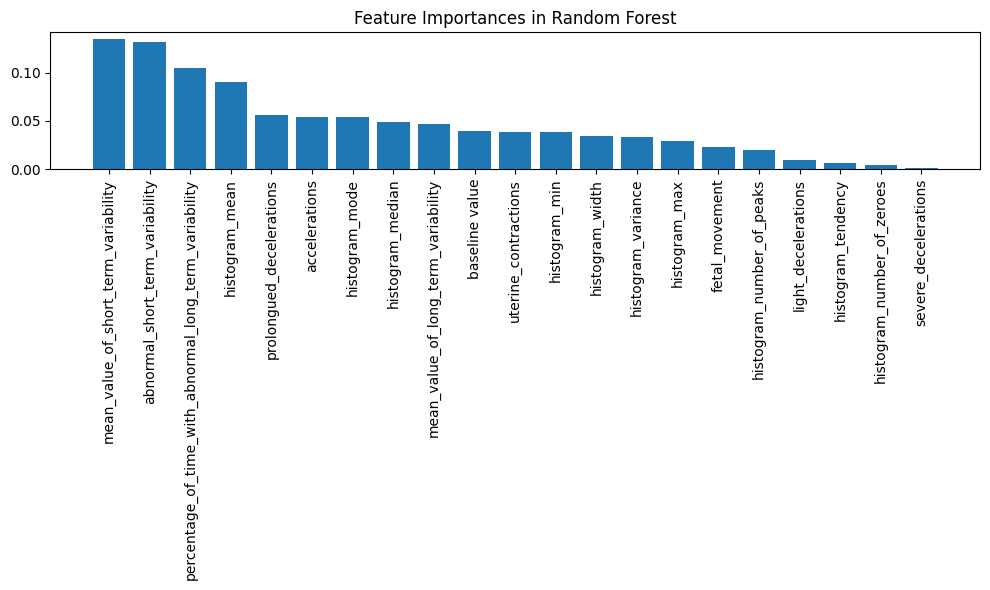

In [21]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances_rf = best_rf.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances_rf[sorted_indices_rf], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices_rf], rotation=90)
plt.tight_layout()
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'max_depth': [3, 4, 5],           # Maximum depth of individual trees
    'learning_rate': [0.01, 0.1, 0.2] # Learning rate
}

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [ ]:
best_gb = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_gb = best_gb.predict(X_test_scaled)

# Evaluate the best Gradient Boosting model
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
class_report_best_gb = classification_report(y_test, y_pred_best_gb)

print("Accuracy of Best Model:", accuracy_best_gb)
print("Classification Report of Best Model:\n", class_report_best_gb)

Accuracy of Best Model: 0.9550827423167849
Classification Report of Best Model:
               precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       330
         2.0       0.94      0.76      0.84        58
         3.0       0.94      0.94      0.94        35

    accuracy                           0.96       423
   macro avg       0.95      0.90      0.92       423
weighted avg       0.95      0.96      0.95       423



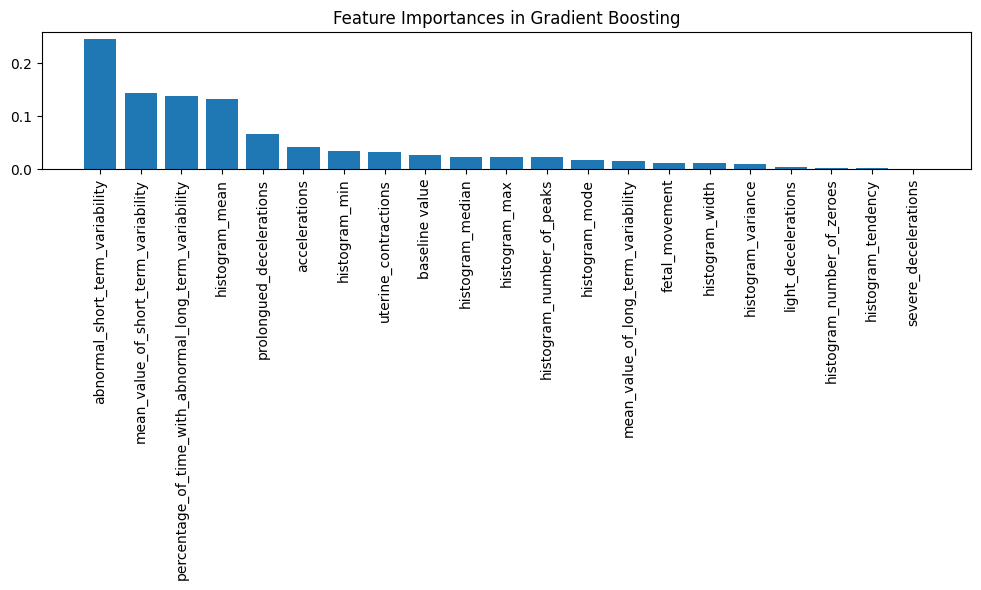

In [22]:
feature_importances_gb = best_gb.feature_importances_

# Sort the feature importances in descending order
sorted_indices_gb = np.argsort(feature_importances_gb)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Gradient Boosting")
plt.bar(range(X_train.shape[1]), feature_importances_gb[sorted_indices_gb], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices_gb], rotation=90)
plt.tight_layout()
plt.show()